# Correlation Matrix

In [2]:
import pandas as pd
import os 
from os import walk, mkdir
from genericpath import exists
import re

## Extracting the Price Columns 

In [2]:
path_resample="/home/ege/Desktop/project/new/Stock_Prices/"

In [3]:
if not exists("/home/ege/Desktop/project/new/Stock_Prices/"):
    mkdir("/home/ege/Desktop/project/new/Stock_Prices/")

In [4]:
paths = [
    "/home/ege/Desktop/project/new/Resampled_Data/",
    "/home/ege/Desktop/project/new/Resamp_5Min/",
    "/home/ege/Desktop/project/new/Resamp_10Mins/"
]

### For 1 Min Time Windows

In [8]:

#merge price dataframes in one dataframe and save it 
#calculate the correlation matrix

In [18]:
day_paths = list()
base_path="/home/ege/Desktop/project/new/Resampled_Data/{}"
for root, dirs, files in walk("/home/ege/Desktop/project/new/001/"):
    for dirr in dirs:
        if dirr.startswith('2'):
            day_paths.append(dirr)

In [19]:
day_paths

['20220420',
 '20220428',
 '20220422',
 '20220425',
 '20220419',
 '20220429',
 '20220421',
 '20220426',
 '20220427']

In [20]:
for day in day_paths:
    mkdir(path_resample+day+"/")

FileExistsError: [Errno 17] File exists: '/home/ege/Desktop/project/new/Stock_Prices/20220420/'

In [24]:
for day in day_paths: 
    print(day)
    for root, dirs, files in walk(base_path.format(day)+"/"):
        for file in files:
            print(base_path.format(day)+"/"+file)
            if "checkpoint" in file:
                print(file + " CHECKPOINT")
                pass
            elif file.endswith('.csv'):
                print(file)
                df = pd.read_csv(base_path.format(day)+"/"+file)
                df['ts']=pd.to_datetime(df['ts'], unit='ns', errors='ignore')
                df.drop(df.index[120:211],axis=0,inplace=True)
                df.set_index('ts',inplace=True)
                df = df.loc[:, ['ltp']]
                df =df.diff(periods=1) # use pandas.DataFrame.diff to save their difference
                df.rename(columns = {'ltp':file.replace('.csv','')}, inplace = True)
                df.to_csv(path_resample+day+"/"+file)

20220420
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600740.csv
SSE_600740.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600733.csv
SSE_600733.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600725.csv
SSE_600725.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600521.csv
SSE_600521.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600606.csv
SSE_600606.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600502.csv
SSE_600502.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600499.csv
SSE_600499.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600512.csv
SSE_600512.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600397.csv
SSE_600397.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600616.csv
SSE_600616.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600588.csv
SSE_600588.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600487.cs

#### Merge price dataframes in one dataframe and save it 

In [31]:
diffs_path='/home/ege/Desktop/project/new/Stock_Prices/{}'

In [119]:
for day in day_paths: 
    print(day)
    for root, dirs, files in walk(diffs_path.format(day)+"/"):
        for file in files:
            print(base_path.format(day)+"/"+file)
            if "checkpoint" in file:
                print(file + " CHECKPOINT")
                pass
            elif file.endswith('.csv'):
                print(file)
                temp_df = pd.read_csv(diffs_path.format(day)+"/"+file)
                temp_df_t =temp_df.T
                headers = temp_df_t.iloc[0]
                concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False) 
                concat_df.to_csv(day+" CONCAT_DF.csv")

20220420
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600740.csv
SSE_600740.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600733.csv
SSE_600733.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600725.csv
SSE_600725.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600521.csv
SSE_600521.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600606.csv
SSE_600606.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600502.csv
SSE_600502.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600499.csv
SSE_600499.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600512.csv
SSE_600512.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600397.csv
SSE_600397.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600616.csv
SSE_600616.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600588.csv
SSE_600588.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600487.cs

/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600704.csv
SSE_600704.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600396.csv
SSE_600396.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600533.csv
SSE_600533.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600705.csv
SSE_600705.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600428.csv
SSE_600428.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600699.csv
SSE_600699.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600675.csv
SSE_600675.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600546.csv
SSE_600546.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600497.csv
SSE_600497.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600684.csv
SSE_600684.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600163.csv
SSE_600163.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600743.csv
SSE_600

/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370


/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600489.csv
SSE_600489.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600765.csv
SSE_600765.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600770.csv
SSE_600770.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600559.csv
SSE_600559.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600208.csv
SSE_600208.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600683.csv
SSE_600683.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600280.csv
SSE_600280.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600418.csv
SSE_600418.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600649.csv
SSE_600649.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600257.csv
SSE_600257.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600470.csv
SSE_600470.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600248.csv
SSE_600248.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600708.csv
SSE_600708.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600572.csv
SSE_600572.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600466.csv
SSE_600466.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600736.csv
SSE_600736.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600238.csv
SSE_600238.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600581.csv
SSE_600581.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600690.csv
SSE_600690.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600201.csv
SSE_600201.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600698.csv
SSE_600698.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600777.csv
SSE_600777.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600467.csv
SSE_600467.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600653.csv
SSE_600653.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600577.csv
SSE_600577.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600370.csv
SSE_600370.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600200.csv
SSE_600200.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600185.csv
SSE_600185.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600582.csv
SSE_600582.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600711.csv
SSE_600711.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600516.csv
SSE_600516.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600100.csv
SSE_600100.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600596.csv
SSE_600596.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600409.csv
SSE_600409.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600703.csv
SSE_600703.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600598.csv
SSE_600598.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600277.csv
SSE_600277.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600657.csv
SSE_600657.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600575.csv
SSE_600575.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600438.csv
SSE_600438.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600755.csv
SSE_600755.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600795.csv
SSE_600795.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600522.csv
SSE_600522.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600628.csv
SSE_600628.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600219.csv
SSE_600219.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600686.csv
SSE_600686.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600569.csv
SSE_600569.csv
/home/ege/Desktop/project/new/Resampled_Data/20220420/SSE_600200-checkpoint.csv
SSE_600200-checkpoint.csv CHECKPOINT
20220428
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600322.csv
SSE_600322.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600153.csv
SSE_600153.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600354.csv
SSE_600354.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600521.csv
SSE_600521.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600176.csv
SSE_600176.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600502.csv
SSE_600502.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600499.csv
SSE_600499.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600512.csv
SSE_600512.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600104.csv
SSE_600104.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600037.csv
SSE_600037.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600170.csv
SSE_600170.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600397.csv
SSE_600397.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600335.csv
SSE_600335.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600359.csv
SSE_600359.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600487.csv
SSE_600487.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600029.csv
SSE_600029.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600366.csv
SSE_600366.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600425.csv
SSE_600425.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600448.csv
SSE_600448.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600330.csv
SSE_600330.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600396.csv
SSE_600396.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600123.csv
SSE_600123.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600428.csv
SSE_600428.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600331.csv
SSE_600331.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600101.csv
SSE_600101.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600030.csv
SSE_600030.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600395.csv
SSE_600395.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600284.csv
SSE_600284.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600312.csv
SSE_600312.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600199.csv
SSE_600199.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600497.csv
SSE_600497.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600163.csv
SSE_600163.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600491.csv
SSE_600491.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600172.csv
SSE_600172.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600022.csv
SSE_600022.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600489.csv
SSE_600489.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600150.csv
SSE_600150.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600208.csv
SSE_600208.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600280.csv
SSE_600280.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600418.csv
SSE_600418.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600257.csv
SSE_600257.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600149.csv
SSE_600149.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600470.csv
SSE_600470.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600248.csv
SSE_600248.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600466.csv
SSE_600466.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600166.csv
SSE_600166.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600336.csv
SSE_600336.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600238.csv
SSE_600238.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600201.csv
SSE_600201.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600027.csv
SSE_600027.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600467.csv
SSE_600467.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600162.csv
SSE_600162.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600256.csv
SSE_600256.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600307.csv
SSE_600307.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600370.csv
SSE_600370.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600338.csv
SSE_600338.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600157.csv
SSE_600157.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600200.csv
SSE_600200.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600185.csv
SSE_600185.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600383.csv
SSE_600383.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600516.csv
SSE_600516.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600276.csv
SSE_600276.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600409.csv
SSE_600409.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600180.csv
SSE_600180.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600325.csv
SSE_600325.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600159.csv
SSE_600159.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600277.csv
SSE_600277.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600282.csv
SSE_600282.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600025.csv
SSE_600025.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600438.csv
SSE_600438.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600313.csv
SSE_600313.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600367.csv
SSE_600367.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600328.csv
SSE_600328.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600141.csv
SSE_600141.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600048.csv
SSE_600048.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600026.csv
SSE_600026.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600219.csv
SSE_600219.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600339.csv
SSE_600339.csv
/home/ege/Desktop/project/new/Resampled_Data/20220428/SSE_600104-checkpoint.csv
SSE_600104-checkpoint.csv CHECKPOINT
20220422
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600322.csv
SSE_600322.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600153.csv
SSE_600153.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600348.csv
SSE_600348.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600354.csv
SSE_600354.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600521.csv
SSE_600521.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600606.csv
SSE_600606.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600176.csv
SSE_600176.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600502.csv
SSE_600502.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600499.csv
SSE_600499.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600512.csv
SSE_600512.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600170.csv
SSE_600170.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600397.csv
SSE_600397.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600335.csv
SSE_600335.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600616.csv
SSE_600616.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600588.csv
SSE_600588.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600359.csv
SSE_600359.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600487.csv
SSE_600487.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600366.csv
SSE_600366.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600425.csv
SSE_600425.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600448.csv
SSE_600448.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600330.csv
SSE_600330.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600704.csv
SSE_600704.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600396.csv
SSE_600396.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600533.csv
SSE_600533.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600705.csv
SSE_600705.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600428.csv
SSE_600428.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600331.csv
SSE_600331.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600101.csv
SSE_600101.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600699.csv
SSE_600699.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600121.csv
SSE_600121.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600675.csv
SSE_600675.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600395.csv
SSE_600395.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600546.csv
SSE_600546.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600312.csv
SSE_600312.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600497.csv
SSE_600497.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600684.csv
SSE_600684.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600110.csv
SSE_600110.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600163.csv
SSE_600163.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600491.csv
SSE_600491.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600172.csv
SSE_600172.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600489.csv
SSE_600489.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600559.csv
SSE_600559.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600150.csv
SSE_600150.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600683.csv
SSE_600683.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600280.csv
SSE_600280.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600418.csv
SSE_600418.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600649.csv
SSE_600649.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600149.csv
SSE_600149.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600470.csv
SSE_600470.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600572.csv
SSE_600572.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600466.csv
SSE_600466.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600166.csv
SSE_600166.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600336.csv
SSE_600336.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600581.csv
SSE_600581.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600690.csv
SSE_600690.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600698.csv
SSE_600698.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600467.csv
SSE_600467.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600162.csv
SSE_600162.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600307.csv
SSE_600307.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600653.csv
SSE_600653.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600577.csv
SSE_600577.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600370.csv
SSE_600370.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600338.csv
SSE_600338.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600157.csv
SSE_600157.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600582.csv
SSE_600582.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600383.csv
SSE_600383.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600516.csv
SSE_600516.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600100.csv
SSE_600100.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600596.csv
SSE_600596.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600409.csv
SSE_600409.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600180.csv
SSE_600180.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600325.csv
SSE_600325.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600159.csv
SSE_600159.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600703.csv
SSE_600703.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600598.csv
SSE_600598.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600657.csv
SSE_600657.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600282.csv
SSE_600282.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600575.csv
SSE_600575.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600438.csv
SSE_600438.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600522.csv
SSE_600522.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600367.csv
SSE_600367.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600328.csv
SSE_600328.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600141.csv
SSE_600141.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600628.csv
SSE_600628.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600339.csv
SSE_600339.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600686.csv
SSE_600686.csv
/home/ege/Desktop/project/new/Resampled_Data/20220422/SSE_600569.csv
SSE_600569.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


20220425
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600153.csv
SSE_600153.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600348.csv
SSE_600348.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600521.csv
SSE_600521.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600606.csv
SSE_600606.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600176.csv
SSE_600176.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600502.csv
SSE_600502.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600499.csv
SSE_600499.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600512.csv
SSE_600512.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600170.csv
SSE_600170.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600397.csv
SSE_600397.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600335.csv
SSE_600335.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600616.csv
SSE_600616.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600588.csv
SSE_600588.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600359.csv
SSE_600359.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600487.csv
SSE_600487.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600366.csv
SSE_600366.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600425.csv
SSE_600425.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600448.csv
SSE_600448.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600330.csv
SSE_600330.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600704.csv
SSE_600704.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600396.csv
SSE_600396.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600533.csv
SSE_600533.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600705.csv
SSE_600705.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600428.csv
SSE_600428.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600331.csv
SSE_600331.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600699.csv
SSE_600699.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600675.csv
SSE_600675.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600395.csv
SSE_600395.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600546.csv
SSE_600546.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600115.csv
SSE_600115.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600497.csv
SSE_600497.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600684.csv
SSE_600684.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600163.csv
SSE_600163.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600491.csv
SSE_600491.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600172.csv
SSE_600172.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600489.csv
SSE_600489.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600559.csv
SSE_600559.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600683.csv
SSE_600683.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600418.csv
SSE_600418.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600649.csv
SSE_600649.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600470.csv
SSE_600470.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600572.csv
SSE_600572.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600466.csv
SSE_600466.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600166.csv
SSE_600166.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600336.csv
SSE_600336.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600581.csv
SSE_600581.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600690.csv
SSE_600690.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600698.csv
SSE_600698.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600467.csv
SSE_600467.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600162.csv
SSE_600162.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600653.csv
SSE_600653.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600577.csv
SSE_600577.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600370.csv
SSE_600370.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600338.csv
SSE_600338.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600157.csv
SSE_600157.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600582.csv
SSE_600582.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600383.csv
SSE_600383.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600516.csv
SSE_600516.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600596.csv
SSE_600596.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600409.csv
SSE_600409.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600180.csv
SSE_600180.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600159.csv
SSE_600159.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600703.csv
SSE_600703.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600598.csv
SSE_600598.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600657.csv
SSE_600657.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600575.csv
SSE_600575.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600438.csv
SSE_600438.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600522.csv
SSE_600522.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600367.csv
SSE_600367.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600628.csv
SSE_600628.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600339.csv
SSE_600339.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600686.csv
SSE_600686.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600569.csv
SSE_600569.csv
/home/ege/Desktop/project/new/Resampled_Data/20220425/SSE_600162-checkpoint.csv
SSE_600162-checkpoint.csv CHECKPOINT
20220419
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600322.csv
SSE_600322.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600858.csv
SSE_600858.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600740.csv
SSE_600740.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600153.csv
SSE_600153.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600348.csv
SSE_600348.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600733.csv
SSE_600733.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600725.csv
SSE_600725.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600354.csv
SSE_600354.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600521.csv
SSE_600521.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600606.csv
SSE_600606.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600096.csv
SSE_600096.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600176.csv
SSE_600176.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600502.csv
SSE_600502.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600499.csv
SSE_600499.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_204001.csv
SSE_204001.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600512.csv
SSE_600512.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600104.csv
SSE_600104.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600037.csv
SSE_600037.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600170.csv
SSE_600170.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600397.csv
SSE_600397.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600335.csv
SSE_600335.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600875.csv
SSE_600875.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600616.csv
SSE_600616.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600588.csv
SSE_600588.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600359.csv
SSE_600359.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600487.csv
SSE_600487.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600029.csv
SSE_600029.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600366.csv
SSE_600366.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600425.csv
SSE_600425.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600448.csv
SSE_600448.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600330.csv
SSE_600330.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600704.csv
SSE_600704.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600863.csv
SSE_600863.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600396.csv
SSE_600396.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600533.csv
SSE_600533.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600871.csv
SSE_600871.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600079.csv
SSE_600079.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600123.csv
SSE_600123.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600705.csv
SSE_600705.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600428.csv
SSE_600428.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600331.csv
SSE_600331.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600101.csv
SSE_600101.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600699.csv
SSE_600699.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600823.csv
SSE_600823.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600121.csv
SSE_600121.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600675.csv
SSE_600675.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600030.csv
SSE_600030.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600395.csv
SSE_600395.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600546.csv
SSE_600546.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600111.csv
SSE_600111.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600115.csv
SSE_600115.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600872.csv
SSE_600872.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600284.csv
SSE_600284.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600312.csv
SSE_600312.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600199.csv
SSE_600199.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600497.csv
SSE_600497.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600684.csv
SSE_600684.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600110.csv
SSE_600110.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600163.csv
SSE_600163.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600743.csv
SSE_600743.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600000.csv
SSE_600000.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600011.csv
SSE_600011.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/370

/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600782.csv
SSE_600782.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_204007.csv
SSE_204007.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600491.csv
SSE_600491.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600172.csv
SSE_600172.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600022.csv
SSE_600022.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600489.csv
SSE_600489.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600765.csv
SSE_600765.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600770.csv
SSE_600770.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600841.csv
SSE_600841.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600559.csv
SSE_600559.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600150.csv
SSE_600150.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600208.csv
SSE_600208.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600820.csv
SSE_600820.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600683.csv
SSE_600683.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600008.csv
SSE_600008.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600280.csv
SSE_600280.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600418.csv
SSE_600418.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600649.csv
SSE_600649.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600089.csv
SSE_600089.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600028.csv
SSE_600028.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600257.csv
SSE_600257.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600149.csv
SSE_600149.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600811.csv
SSE_600811.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600016.csv
SSE_600016.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600010.csv
SSE_600010.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600470.csv
SSE_600470.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600248.csv
SSE_600248.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600108.csv
SSE_600108.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600708.csv
SSE_600708.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600572.csv
SSE_600572.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600466.csv
SSE_600466.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600166.csv
SSE_600166.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600336.csv
SSE_600336.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600736.csv
SSE_600736.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600036.csv
SSE_600036.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600238.csv
SSE_600238.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600581.csv
SSE_600581.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600690.csv
SSE_600690.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600201.csv
SSE_600201.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600698.csv
SSE_600698.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600027.csv
SSE_600027.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600063.csv
SSE_600063.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600777.csv
SSE_600777.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600838.csv
SSE_600838.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600839.csv
SSE_600839.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600467.csv
SSE_600467.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600162.csv
SSE_600162.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600256.csv
SSE_600256.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600307.csv
SSE_600307.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600050.csv
SSE_600050.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600653.csv
SSE_600653.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600577.csv
SSE_600577.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600837.csv
SSE_600837.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600021.csv
SSE_600021.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600370.csv
SSE_600370.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600338.csv
SSE_600338.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600157.csv
SSE_600157.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600200.csv
SSE_600200.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600185.csv
SSE_600185.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600582.csv
SSE_600582.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600383.csv
SSE_600383.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600711.csv
SSE_600711.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600516.csv
SSE_600516.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600100.csv
SSE_600100.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600596.csv
SSE_600596.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600276.csv
SSE_600276.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600409.csv
SSE_600409.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600180.csv
SSE_600180.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600066.csv
SSE_600066.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600808.csv
SSE_600808.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600325.csv
SSE_600325.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600854.csv
SSE_600854.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600159.csv
SSE_600159.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600703.csv
SSE_600703.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600598.csv
SSE_600598.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600277.csv
SSE_600277.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600657.csv
SSE_600657.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600282.csv
SSE_600282.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600025.csv
SSE_600025.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600575.csv
SSE_600575.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600438.csv
SSE_600438.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600018.csv
SSE_600018.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600755.csv
SSE_600755.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600795.csv
SSE_600795.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600313.csv
SSE_600313.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600522.csv
SSE_600522.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600367.csv
SSE_600367.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600328.csv
SSE_600328.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600141.csv
SSE_600141.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600031.csv
SSE_600031.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600048.csv
SSE_600048.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600821.csv
SSE_600821.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600628.csv
SSE_600628.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600019.csv
SSE_600019.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600026.csv
SSE_600026.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600219.csv
SSE_600219.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600339.csv
SSE_600339.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600686.csv
SSE_600686.csv
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600569.csv
SSE_600569.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600871-checkpoint.csv
SSE_600871-checkpoint.csv CHECKPOINT
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600219-checkpoint.csv
SSE_600219-checkpoint.csv CHECKPOINT
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600016-checkpoint.csv
SSE_600016-checkpoint.csv CHECKPOINT
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600000-checkpoint.csv
SSE_600000-checkpoint.csv CHECKPOINT
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_204001-checkpoint.csv
SSE_204001-checkpoint.csv CHECKPOINT
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_204007-checkpoint.csv
SSE_204007-checkpoint.csv CHECKPOINT
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600025-checkpoint.csv
SSE_600025-checkpoint.csv CHECKPOINT
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600153-checkpoint.csv
SSE_600153-checkpoint.csv CHECKPOINT
/home/ege/Desktop/project/new/Resampled_Data/20220419/SSE_600010

/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600354.csv
SSE_600354.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600521.csv
SSE_600521.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600176.csv
SSE_600176.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600502.csv
SSE_600502.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600499.csv
SSE_600499.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600512.csv
SSE_600512.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600104.csv
SSE_600104.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600037.csv
SSE_600037.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600170.csv
SSE_600170.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600397.csv
SSE_600397.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600335.csv
SSE_600335.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600359.csv
SSE_600359.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600487.csv
SSE_600487.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600366.csv
SSE_600366.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600425.csv
SSE_600425.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600448.csv
SSE_600448.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600330.csv
SSE_600330.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600396.csv
SSE_600396.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600123.csv
SSE_600123.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600428.csv
SSE_600428.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600331.csv
SSE_600331.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600121.csv
SSE_600121.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600395.csv
SSE_600395.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600115.csv
SSE_600115.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600284.csv
SSE_600284.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600312.csv
SSE_600312.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600199.csv
SSE_600199.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600497.csv
SSE_600497.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600163.csv
SSE_600163.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600491.csv
SSE_600491.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600172.csv
SSE_600172.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600489.csv
SSE_600489.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600150.csv
SSE_600150.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600208.csv
SSE_600208.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600280.csv
SSE_600280.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600418.csv
SSE_600418.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600257.csv
SSE_600257.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600149.csv
SSE_600149.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600470.csv
SSE_600470.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600248.csv
SSE_600248.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600108.csv
SSE_600108.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600466.csv
SSE_600466.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600166.csv
SSE_600166.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600336.csv
SSE_600336.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600238.csv
SSE_600238.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600201.csv
SSE_600201.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600467.csv
SSE_600467.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600162.csv
SSE_600162.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600256.csv
SSE_600256.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600307.csv
SSE_600307.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600370.csv
SSE_600370.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600338.csv
SSE_600338.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600157.csv
SSE_600157.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600200.csv
SSE_600200.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600185.csv
SSE_600185.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600383.csv
SSE_600383.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600516.csv
SSE_600516.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600276.csv
SSE_600276.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600409.csv
SSE_600409.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600180.csv
SSE_600180.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600325.csv
SSE_600325.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600159.csv
SSE_600159.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600277.csv
SSE_600277.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600282.csv
SSE_600282.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600438.csv
SSE_600438.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600313.csv
SSE_600313.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600367.csv
SSE_600367.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600328.csv
SSE_600328.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600141.csv
SSE_600141.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600219.csv
SSE_600219.csv
/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600339.csv
SSE_600339.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220429/SSE_600141-checkpoint.csv
SSE_600141-checkpoint.csv CHECKPOINT
20220421
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600322.csv
SSE_600322.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600354.csv
SSE_600354.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600521.csv
SSE_600521.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600606.csv
SSE_600606.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600176.csv
SSE_600176.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600502.csv
SSE_600502.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600499.csv
SSE_600499.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600512.csv
SSE_600512.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600170.csv
SSE_600170.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600397.csv
SSE_600397.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600335.csv
SSE_600335.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600616.csv
SSE_600616.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600588.csv
SSE_600588.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600359.csv
SSE_600359.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600487.csv
SSE_600487.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600366.csv
SSE_600366.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600425.csv
SSE_600425.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600448.csv
SSE_600448.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600330.csv
SSE_600330.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600704.csv
SSE_600704.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600396.csv
SSE_600396.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600533.csv
SSE_600533.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600705.csv
SSE_600705.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600428.csv
SSE_600428.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600331.csv
SSE_600331.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600699.csv
SSE_600699.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600675.csv
SSE_600675.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600395.csv
SSE_600395.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600546.csv
SSE_600546.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600312.csv
SSE_600312.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600497.csv
SSE_600497.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600684.csv
SSE_600684.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600163.csv
SSE_600163.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600491.csv
SSE_600491.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600172.csv
SSE_600172.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600489.csv
SSE_600489.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600559.csv
SSE_600559.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600683.csv
SSE_600683.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600418.csv
SSE_600418.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600649.csv
SSE_600649.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600470.csv
SSE_600470.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600572.csv
SSE_600572.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600466.csv
SSE_600466.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600336.csv
SSE_600336.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600581.csv
SSE_600581.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600690.csv
SSE_600690.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600698.csv
SSE_600698.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600467.csv
SSE_600467.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600162.csv
SSE_600162.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600653.csv
SSE_600653.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600577.csv
SSE_600577.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600370.csv
SSE_600370.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600338.csv
SSE_600338.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600582.csv
SSE_600582.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600383.csv
SSE_600383.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600516.csv
SSE_600516.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600596.csv
SSE_600596.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600409.csv
SSE_600409.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600180.csv
SSE_600180.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600325.csv
SSE_600325.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600159.csv
SSE_600159.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600703.csv
SSE_600703.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600598.csv
SSE_600598.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600657.csv
SSE_600657.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600575.csv
SSE_600575.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600438.csv
SSE_600438.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600522.csv
SSE_600522.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600367.csv
SSE_600367.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600328.csv
SSE_600328.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600628.csv
SSE_600628.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600339.csv
SSE_600339.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600686.csv
SSE_600686.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600569.csv
SSE_600569.csv
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600163-checkpoint.csv
SSE_600163-checkpoint.csv CHECKPOINT
/home/ege/Desktop/project/new/Resampled_Data/20220421/SSE_600328-checkpoint.csv
SSE_600328-checkpoint.csv CHECKPOINT
20220426
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600322.csv
SSE_600322.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600153.csv
SSE_600153.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600348.csv
SSE_600348.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600354.csv
SSE_600354.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600521.csv
SSE_600521.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600176.csv
SSE_600176.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600502.csv
SSE_600502.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600499.csv
SSE_600499.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600512.csv
SSE_600512.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600170.csv
SSE_600170.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600397.csv
SSE_600397.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600335.csv
SSE_600335.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600359.csv
SSE_600359.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600487.csv
SSE_600487.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600029.csv
SSE_600029.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600366.csv
SSE_600366.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600425.csv
SSE_600425.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600448.csv
SSE_600448.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600330.csv
SSE_600330.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600396.csv
SSE_600396.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600123.csv
SSE_600123.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600428.csv
SSE_600428.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600331.csv
SSE_600331.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600121.csv
SSE_600121.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600395.csv
SSE_600395.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600115.csv
SSE_600115.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600284.csv
SSE_600284.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600312.csv
SSE_600312.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600199.csv
SSE_600199.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600497.csv
SSE_600497.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600110.csv
SSE_600110.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600491.csv
SSE_600491.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600172.csv
SSE_600172.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600489.csv
SSE_600489.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600150.csv
SSE_600150.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600208.csv
SSE_600208.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600280.csv
SSE_600280.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600418.csv
SSE_600418.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600257.csv
SSE_600257.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600149.csv
SSE_600149.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600470.csv
SSE_600470.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600248.csv
SSE_600248.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600466.csv
SSE_600466.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600166.csv
SSE_600166.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600336.csv
SSE_600336.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600238.csv
SSE_600238.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600201.csv
SSE_600201.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600467.csv
SSE_600467.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600162.csv
SSE_600162.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600256.csv
SSE_600256.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600307.csv
SSE_600307.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600370.csv
SSE_600370.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600338.csv
SSE_600338.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600157.csv
SSE_600157.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600200.csv
SSE_600200.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600185.csv
SSE_600185.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600383.csv
SSE_600383.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600516.csv
SSE_600516.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600276.csv
SSE_600276.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600409.csv
SSE_600409.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600180.csv
SSE_600180.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600325.csv
SSE_600325.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600159.csv
SSE_600159.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600277.csv
SSE_600277.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600282.csv
SSE_600282.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600438.csv
SSE_600438.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600313.csv
SSE_600313.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600367.csv
SSE_600367.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600328.csv
SSE_600328.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600141.csv
SSE_600141.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600219.csv
SSE_600219.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600339.csv
SSE_600339.csv
/home/ege/Desktop/project/new/Resampled_Data/20220426/SSE_600123-checkpoint.csv
SSE_600123-checkpoint.csv CHECKPOINT
20220427
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600322.csv
SSE_600322.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600153.csv
SSE_600153.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600348.csv
SSE_600348.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600354.csv
SSE_600354.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600521.csv
SSE_600521.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600176.csv
SSE_600176.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600502.csv
SSE_600502.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600499.csv
SSE_600499.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600512.csv
SSE_600512.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600104.csv
SSE_600104.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600170.csv
SSE_600170.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600397.csv
SSE_600397.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600335.csv
SSE_600335.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600359.csv
SSE_600359.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600487.csv
SSE_600487.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600366.csv
SSE_600366.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600425.csv
SSE_600425.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600448.csv
SSE_600448.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600330.csv
SSE_600330.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600396.csv
SSE_600396.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600123.csv
SSE_600123.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600428.csv
SSE_600428.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600331.csv
SSE_600331.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600395.csv
SSE_600395.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600284.csv
SSE_600284.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600312.csv
SSE_600312.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600199.csv
SSE_600199.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600497.csv
SSE_600497.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600163.csv
SSE_600163.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600491.csv
SSE_600491.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600172.csv
SSE_600172.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600489.csv
SSE_600489.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600150.csv
SSE_600150.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600208.csv
SSE_600208.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600280.csv
SSE_600280.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600418.csv
SSE_600418.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600257.csv
SSE_600257.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600149.csv
SSE_600149.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600470.csv
SSE_600470.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600248.csv
SSE_600248.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600466.csv
SSE_600466.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600166.csv
SSE_600166.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600336.csv
SSE_600336.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600238.csv
SSE_600238.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600201.csv
SSE_600201.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600027.csv
SSE_600027.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600467.csv
SSE_600467.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600162.csv
SSE_600162.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600256.csv
SSE_600256.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600307.csv
SSE_600307.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600370.csv
SSE_600370.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600338.csv
SSE_600338.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600157.csv
SSE_600157.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600200.csv
SSE_600200.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600185.csv
SSE_600185.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600383.csv
SSE_600383.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600516.csv
SSE_600516.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600276.csv
SSE_600276.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600409.csv
SSE_600409.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600180.csv
SSE_600180.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600325.csv
SSE_600325.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600159.csv
SSE_600159.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600277.csv
SSE_600277.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600282.csv
SSE_600282.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600438.csv
SSE_600438.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600313.csv
SSE_600313.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600367.csv
SSE_600367.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600328.csv
SSE_600328.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600141.csv
SSE_600141.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600026.csv
SSE_600026.csv


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)
/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600219.csv
SSE_600219.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600339.csv
SSE_600339.csv
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600141-checkpoint.csv
SSE_600141-checkpoint.csv CHECKPOINT
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600150-checkpoint.csv
SSE_600150-checkpoint.csv CHECKPOINT
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600123-checkpoint.csv
SSE_600123-checkpoint.csv CHECKPOINT
/home/ege/Desktop/project/new/Resampled_Data/20220427/SSE_600026-checkpoint.csv
SSE_600026-checkpoint.csv CHECKPOINT


/tmp/ipykernel_37775/3705381019.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_df = concat_df.append(temp_df_t.iloc[1], ignore_index = False)


In [3]:
corrdf = pd.read_csv('/home/ege/Desktop/project/new/Concat_DFs/20220420_CONCAT_DF.csv')
corrdf.dropna(axis=1,inplace=True)
corrM = corrdf.corr()
corrM

,1,2,3,4,5,6,7,8,9,10,...,209,210,217,218,219,222,225,226,227,228
1,1.000000,-0.018379,0.388239,-0.313688,-0.373711,-0.301444,0.118170,0.034058,0.033631,-0.623638,...,-0.007471,0.455650,-0.028914,-0.118624,0.099743,0.026778,-0.067039,-0.118904,-0.121479,-0.159457
2,-0.018379,1.000000,0.465897,-0.130489,0.133514,-0.152533,-0.016474,-0.100708,-0.087023,-0.202210,...,0.265134,-0.516404,-0.532590,-0.216629,0.071465,0.091039,-0.063892,0.047233,-0.069207,0.013673
3,0.388239,0.465897,1.000000,-0.265213,0.084339,-0.298291,0.055773,-0.067653,-0.049552,-0.623855,...,0.538640,-0.365168,-0.385093,-0.312756,-0.155365,-0.118403,-0.093125,-0.006448,-0.097555,-0.107282
4,-0.313688,-0.130489,-0.265213,1.000000,0.442372,0.315860,-0.371227,-0.080870,-0.085842,0.459866,...,-0.216993,-0.012489,0.225025,0.210590,-0.057880,-0.041230,-0.121977,0.279562,-0.123170,0.256963
5,-0.373711,0.133514,0.084339,0.442372,1.000000,0.348838,-0.478837,-0.018371,0.012030,0.080801,...,-0.141352,-0.536327,0.168614,0.132684,-0.007346,-0.327280,-0.052676,0.287272,-0.055099,0.498930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.026778,0.091039,-0.118403,-0.041230,-0.327280,0.126322,0.308892,0.038109,0.043773,0.052451,...,-0.056766,0.262743,-0.406387,0.440813,0.435919,1.000000,-0.013857,-0.008852,-0.018828,-0.054323
225,-0.067039,-0.063892,-0.093125,-0.121977,-0.052676,0.022802,0.025411,0.020925,0.010955,0.059144,...,0.046398,0.012946,-0.023967,-0.046436,-0.051220,-0.013857,1.000000,-0.898274,0.976670,-0.401155
226,-0.118904,0.047233,-0.006448,0.279562,0.287272,0.191724,-0.260964,-0.018012,0.007209,0.088780,...,-0.162047,-0.118060,0.196711,0.260965,0.095484,-0.008852,-0.898274,1.000000,-0.867733,0.606515
227,-0.121479,-0.069207,-0.097555,-0.123170,-0.055099,0.054822,0.050651,0.029402,0.017972,0.114053,...,0.106595,-0.042819,-0.032511,-0.071401,-0.091768,-0.018828,0.976670,-0.867733,1.000000,-0.388457


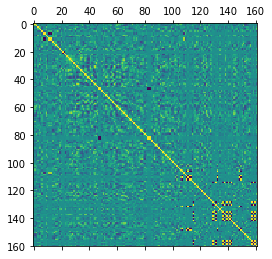

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.matshow(corrM)
plt.show()

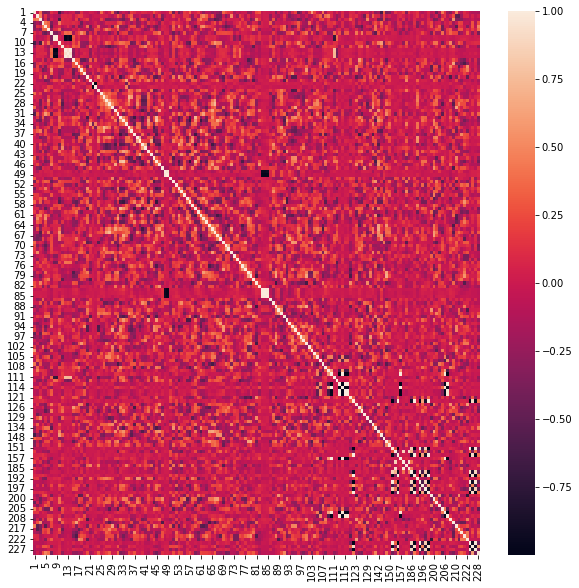

In [16]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corrM, annot=False)# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Time-Lag Correlation

In [4]:
corrdf

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,209,210,217,218,219,222,225,226,227,228
0,SSE_600200,-0.018381,0.002154,0.002957,-0.007755,0.004269,-0.004792,-0.009405,0.010571,-0.005333,...,-0.002157,0.006923,0.004222,-0.006929,0.002821,-0.020790,-0.006020,0.004889,0.008375,0.008199
1,SSE_600370,0.003545,0.010333,0.005867,-0.001138,0.005937,0.000526,-0.007356,0.000877,-0.004574,...,-0.001533,0.002811,-0.001671,0.002370,0.007238,-0.004348,-0.001010,0.002134,0.007228,-0.001923
2,SSE_600740,0.063349,-0.029221,0.000014,-0.015170,-0.045702,0.013973,-0.021139,-0.011130,0.030462,...,-0.013918,0.002220,0.001741,0.024471,-0.002423,-0.009140,0.001814,-0.000399,0.009778,0.008464
3,SSE_600733,0.000694,0.003244,-0.005348,-0.009995,0.021983,-0.003406,0.023236,0.019706,-0.004843,...,-0.004388,-0.007844,0.005055,0.001202,0.011147,-0.008552,0.002759,0.004102,0.002002,-0.003119
4,SSE_600725,0.043591,0.000312,0.050583,-0.011202,-0.002151,0.007085,-0.002301,0.016496,0.034354,...,0.000814,-0.003791,-0.003147,0.010508,0.014023,-0.008825,0.001101,-0.003177,-0.002870,-0.000654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,SSE_600522,-0.004942,-0.019908,-0.028816,-0.058124,-0.004688,0.048855,0.032004,-0.010926,-0.001389,...,0.001061,-0.005058,-0.009599,-0.018527,-0.004401,-0.009556,0.001512,-0.002304,0.017175,0.038632
73,SSE_600628,-0.009594,0.035645,0.021788,0.007276,-0.013719,-0.017613,0.112355,-3.082825,-4.401056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
74,SSE_600219,-0.002957,0.000769,-0.000776,-0.013042,-0.008750,0.004940,0.009022,0.004085,-0.005856,...,-0.005078,-0.002716,0.002759,0.002426,0.001651,-0.004133,-0.000231,-0.001563,0.001200,-0.001206
75,SSE_600686,0.018029,0.002678,0.018703,0.029298,0.024978,-0.004146,-0.006649,-0.005015,-0.011752,...,0.000526,0.008474,0.001625,0.006875,0.000000,-0.000134,0.006000,-0.002222,-0.005778,0.006571


In [1]:
def df_shifted(df, target=None, lag=0):
    if not lag and not target:
        return df       
    new = {}
    for c in df.columns:
        if c == target:
            new[c] = df[target]
        else:
            new[c] = df[c].shift(periods=lag)
    return  pd.DataFrame(data=new)

In [10]:
df_shifted(corrdf,"SSE_600200",lag=2).corr()

,1,2,3,4,5,6,7,8,9,10,...,209,210,217,218,219,222,225,226,227,228
1,1.000000,-0.017967,0.387820,-0.322743,-0.377825,-0.302205,0.119158,0.033809,0.033431,-0.623672,...,-0.008660,0.455832,-0.028601,-0.118435,0.101443,0.027032,-0.066801,-0.118678,-0.120781,-0.160058
2,-0.017967,1.000000,0.467003,-0.129079,0.135988,-0.154500,-0.017286,-0.100497,-0.086849,-0.202657,...,0.266894,-0.516995,-0.533142,-0.217138,0.070404,0.090839,-0.064170,0.046998,-0.070029,0.014075
3,0.387820,0.467003,1.000000,-0.276257,0.082188,-0.297806,0.057307,-0.068259,-0.050020,-0.623780,...,0.538010,-0.370470,-0.384788,-0.312449,-0.153348,-0.118004,-0.092660,-0.006114,-0.096282,-0.107963
4,-0.322743,-0.129079,-0.276257,1.000000,0.437068,0.332954,-0.370257,-0.084599,-0.089158,0.470691,...,-0.231357,-0.029558,0.231697,0.217142,-0.046906,-0.039710,-0.121585,0.286557,-0.118276,0.257910
5,-0.377825,0.135988,0.082188,0.437068,1.000000,0.351181,-0.478526,-0.018527,0.011975,0.081283,...,-0.144730,-0.548302,0.169903,0.132502,-0.004596,-0.329098,-0.052860,0.291921,-0.052528,0.498306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.027032,0.090839,-0.118004,-0.039710,-0.329098,0.125212,0.308723,0.038482,0.044054,0.051993,...,-0.055742,0.265321,-0.406957,0.440563,0.435982,1.000000,-0.014206,-0.008675,-0.019367,-0.054577
225,-0.066801,-0.064170,-0.092660,-0.121585,-0.052860,0.020878,0.024923,0.021328,0.011253,0.058642,...,0.047792,0.014501,-0.024419,-0.047199,-0.052843,-0.014206,1.000000,-0.898622,0.977019,-0.401763
226,-0.118678,0.046998,-0.006114,0.286557,0.291921,0.194659,-0.261848,-0.018259,0.007060,0.089192,...,-0.162725,-0.117942,0.197055,0.261989,0.096015,-0.008675,-0.898622,1.000000,-0.869139,0.608358
227,-0.120781,-0.070029,-0.096282,-0.118276,-0.052528,0.052654,0.049177,0.030004,0.018439,0.113422,...,0.109270,-0.039387,-0.033237,-0.072285,-0.094857,-0.019367,0.977019,-0.869139,1.000000,-0.388452


In [9]:
corrM

,1,2,3,4,5,6,7,8,9,10,...,209,210,217,218,219,222,225,226,227,228
1,1.000000,-0.018379,0.388239,-0.313688,-0.373711,-0.301444,0.118170,0.034058,0.033631,-0.623638,...,-0.007471,0.455650,-0.028914,-0.118624,0.099743,0.026778,-0.067039,-0.118904,-0.121479,-0.159457
2,-0.018379,1.000000,0.465897,-0.130489,0.133514,-0.152533,-0.016474,-0.100708,-0.087023,-0.202210,...,0.265134,-0.516404,-0.532590,-0.216629,0.071465,0.091039,-0.063892,0.047233,-0.069207,0.013673
3,0.388239,0.465897,1.000000,-0.265213,0.084339,-0.298291,0.055773,-0.067653,-0.049552,-0.623855,...,0.538640,-0.365168,-0.385093,-0.312756,-0.155365,-0.118403,-0.093125,-0.006448,-0.097555,-0.107282
4,-0.313688,-0.130489,-0.265213,1.000000,0.442372,0.315860,-0.371227,-0.080870,-0.085842,0.459866,...,-0.216993,-0.012489,0.225025,0.210590,-0.057880,-0.041230,-0.121977,0.279562,-0.123170,0.256963
5,-0.373711,0.133514,0.084339,0.442372,1.000000,0.348838,-0.478837,-0.018371,0.012030,0.080801,...,-0.141352,-0.536327,0.168614,0.132684,-0.007346,-0.327280,-0.052676,0.287272,-0.055099,0.498930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.026778,0.091039,-0.118403,-0.041230,-0.327280,0.126322,0.308892,0.038109,0.043773,0.052451,...,-0.056766,0.262743,-0.406387,0.440813,0.435919,1.000000,-0.013857,-0.008852,-0.018828,-0.054323
225,-0.067039,-0.063892,-0.093125,-0.121977,-0.052676,0.022802,0.025411,0.020925,0.010955,0.059144,...,0.046398,0.012946,-0.023967,-0.046436,-0.051220,-0.013857,1.000000,-0.898274,0.976670,-0.401155
226,-0.118904,0.047233,-0.006448,0.279562,0.287272,0.191724,-0.260964,-0.018012,0.007209,0.088780,...,-0.162047,-0.118060,0.196711,0.260965,0.095484,-0.008852,-0.898274,1.000000,-0.867733,0.606515
227,-0.121479,-0.069207,-0.097555,-0.123170,-0.055099,0.054822,0.050651,0.029402,0.017972,0.114053,...,0.106595,-0.042819,-0.032511,-0.071401,-0.091768,-0.018828,0.976670,-0.867733,1.000000,-0.388457
